# Librerias utilizadas

In [1]:
jupyter = False

In [2]:
if jupyter:
    import wget
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.linalg import toeplitz
from IPython.display import clear_output
from os import path
from scipy.ndimage.interpolation import shift
from matplotlib.mlab import psd

In [3]:
# Collab
if not jupyter:
    !wget https://github.com/ManuMollon261297/PASA/blob/master/TP5-LMS-Project/Dataset/Contaminated_Data.mat?raw=true
    !wget https://github.com/ManuMollon261297/PASA/blob/master/TP5-LMS-Project/Dataset/HEOG.mat?raw=true
    !wget https://github.com/ManuMollon261297/PASA/blob/master/TP5-LMS-Project/Dataset/Pure_Data.mat?raw=true
    !wget https://github.com/ManuMollon261297/PASA/blob/master/TP5-LMS-Project/Dataset/VEOG.mat?raw=true
    clear_output()

# Jupyter
if jupyter:
    cont_data_url = 'https://github.com/ManuMollon261297/PASA/blob/master/TP5-LMS-Project/Dataset/Contaminated_Data.mat?raw=true'
    if not path.exists('Contaminated_Data.mat'):
       cont_data_file = wget.download(cont_data_url)
    else:
       print('Already Downloaded File')
       cont_data_file = 'Contaminated_Data.mat'
    pure_data_url = 'https://github.com/ManuMollon261297/PASA/blob/master/TP5-LMS-Project/Dataset/Pure_Data.mat?raw=true'
    if not path.exists('Pure_Data.mat'):
       pure_data_file = wget.download(pure_data_url)
    else:
       print('Already Downloaded File')
       pure_data_file = 'Pure_Data.mat'
    heog_url = 'https://github.com/ManuMollon261297/PASA/blob/master/TP5-LMS-Project/Dataset/HEOG.mat?raw=true'
    if not path.exists('HEOG.mat'):
       heog_file = wget.download(heog_url)
    else:
       print('Already Downloaded File')
       heog_file = 'HEOG.mat'
    veog_url = 'https://github.com/ManuMollon261297/PASA/blob/master/TP5-LMS-Project/Dataset/VEOG.mat?raw=true'
    if not path.exists('VEOG.mat'):
       veog_file = wget.download(veog_url)
    else:
       print('Already Downloaded File')
       veog_file = 'VEOG.mat'

# Visualizacion del dataset

In [4]:
def RemoveKeys(dict_):
    new_dict = dict_.copy()
    new_dict.pop('__header__')
    new_dict.pop('__version__')
    new_dict.pop('__globals__')
    return  new_dict

def AddPlot(signal, n_rows, n_cols, index, title):
    plt.subplot(n_rows,n_cols,index)
    plt.title(title)
    plt.plot(signal)
    plt.grid(True)

dict_keys(['sim1_resampled', 'sim2_resampled', 'sim3_resampled', 'sim4_resampled', 'sim5_resampled', 'sim6_resampled', 'sim7_resampled', 'sim8_resampled', 'sim9_resampled', 'sim10_resampled', 'sim11_resampled', 'sim12_resampled', 'sim13_resampled', 'sim14_resampled', 'sim15_resampled', 'sim16_resampled', 'sim17_resampled', 'sim18_resampled', 'sim19_resampled', 'sim20_resampled', 'sim21_resampled', 'sim22_resampled', 'sim23_resampled', 'sim24_resampled', 'sim25_resampled', 'sim26_resampled', 'sim27_resampled', 'sim28_resampled', 'sim29_resampled', 'sim30_resampled', 'sim31_resampled', 'sim32_resampled', 'sim33_resampled', 'sim34_resampled', 'sim35_resampled', 'sim36_resampled', 'sim37_resampled', 'sim38_resampled', 'sim39_resampled', 'sim40_resampled', 'sim41_resampled', 'sim42_resampled', 'sim43_resampled', 'sim44_resampled', 'sim45_resampled', 'sim46_resampled', 'sim47_resampled', 'sim48_resampled', 'sim49_resampled', 'sim50_resampled', 'sim51_resampled', 'sim52_resampled', 'sim53_res

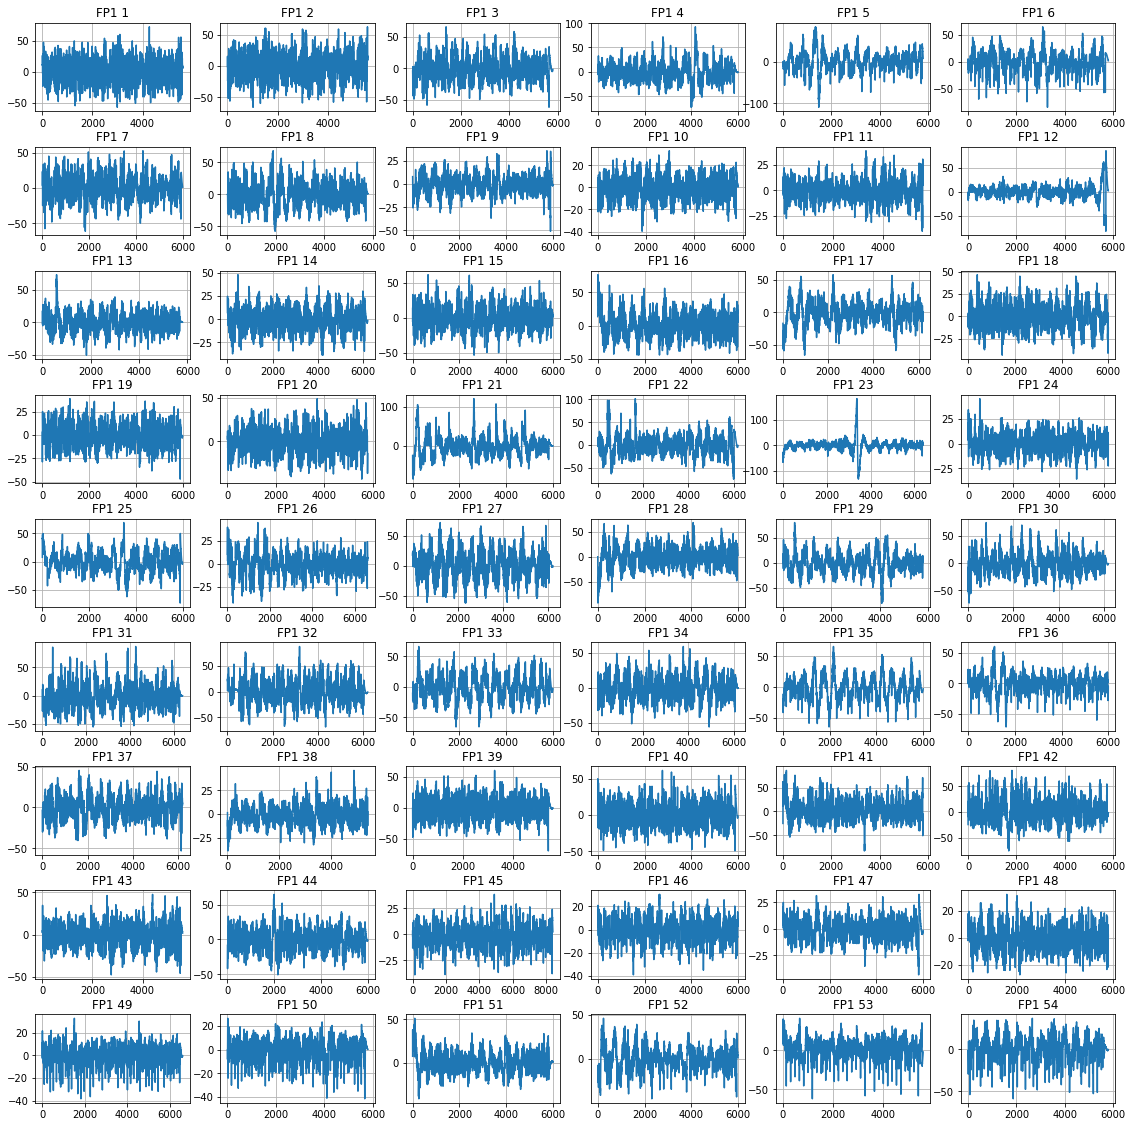

In [5]:
if jupyter:
    clean_dict = loadmat(pure_data_file)
else:
    clean_dict = loadmat("Pure_Data.mat?raw=true") 

new_clean = RemoveKeys(clean_dict)
print(new_clean.keys())
clean_list = [new_clean[eeg] for eeg in new_clean.keys()]
c_shapes = [ clean_list[i].shape[1] for i in range(0,len(clean_list))]
print("len clean_list: " + str( len(clean_list) ) )
print("numero de canales eeg por elemento de la lista: "+str( clean_list[0].shape[0] ))
print("len de clean mas larga: "+str( np.amax(c_shapes) ))
print("len de clean mas corta: "+str( np.amin(c_shapes) ))

fig = plt.figure(figsize=(15,15))
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0.4, wspace = 0.2)
for i in range(0,len(clean_list)):
    AddPlot(clean_list[i][0], 9, 6, i+1, "FP1 "+str(i+1))
plt.show()

dict_keys(['veog_1', 'veog_2', 'veog_3', 'veog_4', 'veog_5', 'veog_6', 'veog_7', 'veog_8', 'veog_9', 'veog_10', 'veog_11', 'veog_12', 'veog_13', 'veog_14', 'veog_15', 'veog_16', 'veog_17', 'veog_18', 'veog_19', 'veog_20', 'veog_21', 'veog_22', 'veog_23', 'veog_24', 'veog_25', 'veog_26', 'veog_27', 'veog_28', 'veog_29', 'veog_30', 'veog_31', 'veog_32', 'veog_33', 'veog_34', 'veog_35', 'veog_36', 'veog_37', 'veog_38', 'veog_39', 'veog_40', 'veog_41', 'veog_42', 'veog_43', 'veog_44', 'veog_45', 'veog_46', 'veog_47', 'veog_48', 'veog_49', 'veog_50', 'veog_51', 'veog_52', 'veog_53', 'veog_54'])
len veog_list: 54
len de veog mas larga: 8401
len de veog mas corta: 5401


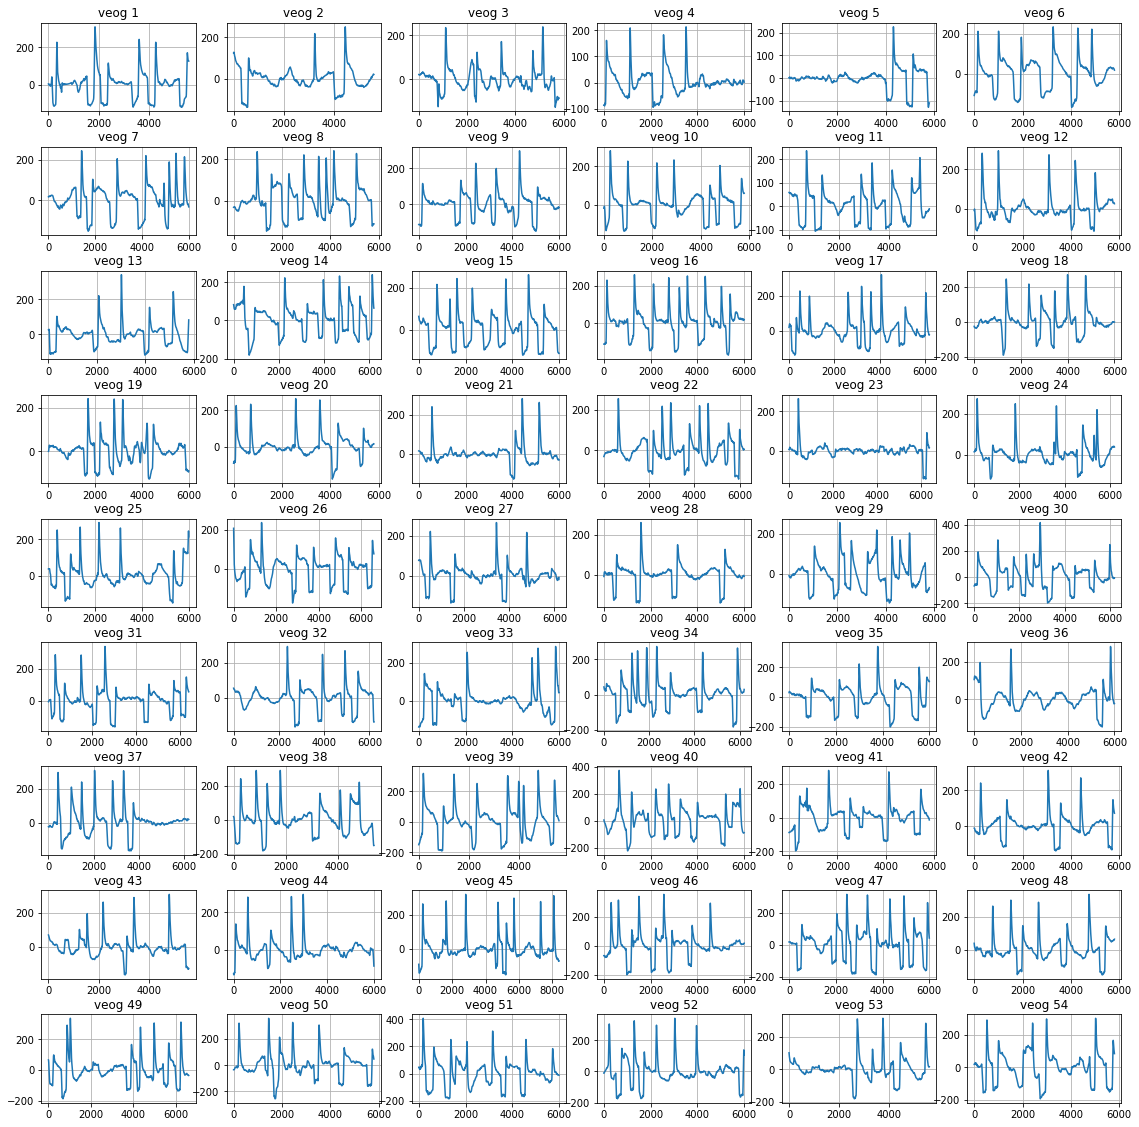

In [6]:
if jupyter:
    veog_dict = loadmat(veog_file)
else:
    veog_dict = loadmat("VEOG.mat?raw=true")

keys = [veog_dict.keys()]
new_veog = RemoveKeys(veog_dict)
print(new_veog.keys())
veog_list = [new_veog[veog] for veog in new_veog.keys()]
v_shapes = [ veog_list[i].shape[1] for i in range(0,len(veog_list))]
print("len veog_list: " + str( len(veog_list) ) )
print("len de veog mas larga: "+str( np.amax(v_shapes) ))
print("len de veog mas corta: "+str( np.amin(v_shapes) ))

fig = plt.figure(figsize=(15,15))
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0.4, wspace = 0.2)
for i in range(0,len(veog_list)):
    AddPlot(veog_list[i][0], 9, 6, i+1, "veog "+str(i+1))
plt.show()

dict_keys(['heog_1', 'heog_2', 'heog_3', 'heog_4', 'heog_5', 'heog_6', 'heog_7', 'heog_8', 'heog_9', 'heog_10', 'heog_11', 'heog_12', 'heog_13', 'heog_14', 'heog_15', 'heog_16', 'heog_17', 'heog_18', 'heog_19', 'heog_20', 'heog_21', 'heog_22', 'heog_23', 'heog_24', 'heog_25', 'heog_26', 'heog_27', 'heog_28', 'heog_29', 'heog_30', 'heog_31', 'heog_32', 'heog_33', 'heog_34', 'heog_35', 'heog_36', 'heog_37', 'heog_38', 'heog_39', 'heog_40', 'heog_41', 'heog_42', 'heog_43', 'heog_44', 'heog_45', 'heog_46', 'heog_47', 'heog_48', 'heog_49', 'heog_50', 'heog_51', 'heog_52', 'heog_53', 'heog_54'])
len heog_list: 54
len de heog mas larga: 8401
len de heog mas corta: 5401


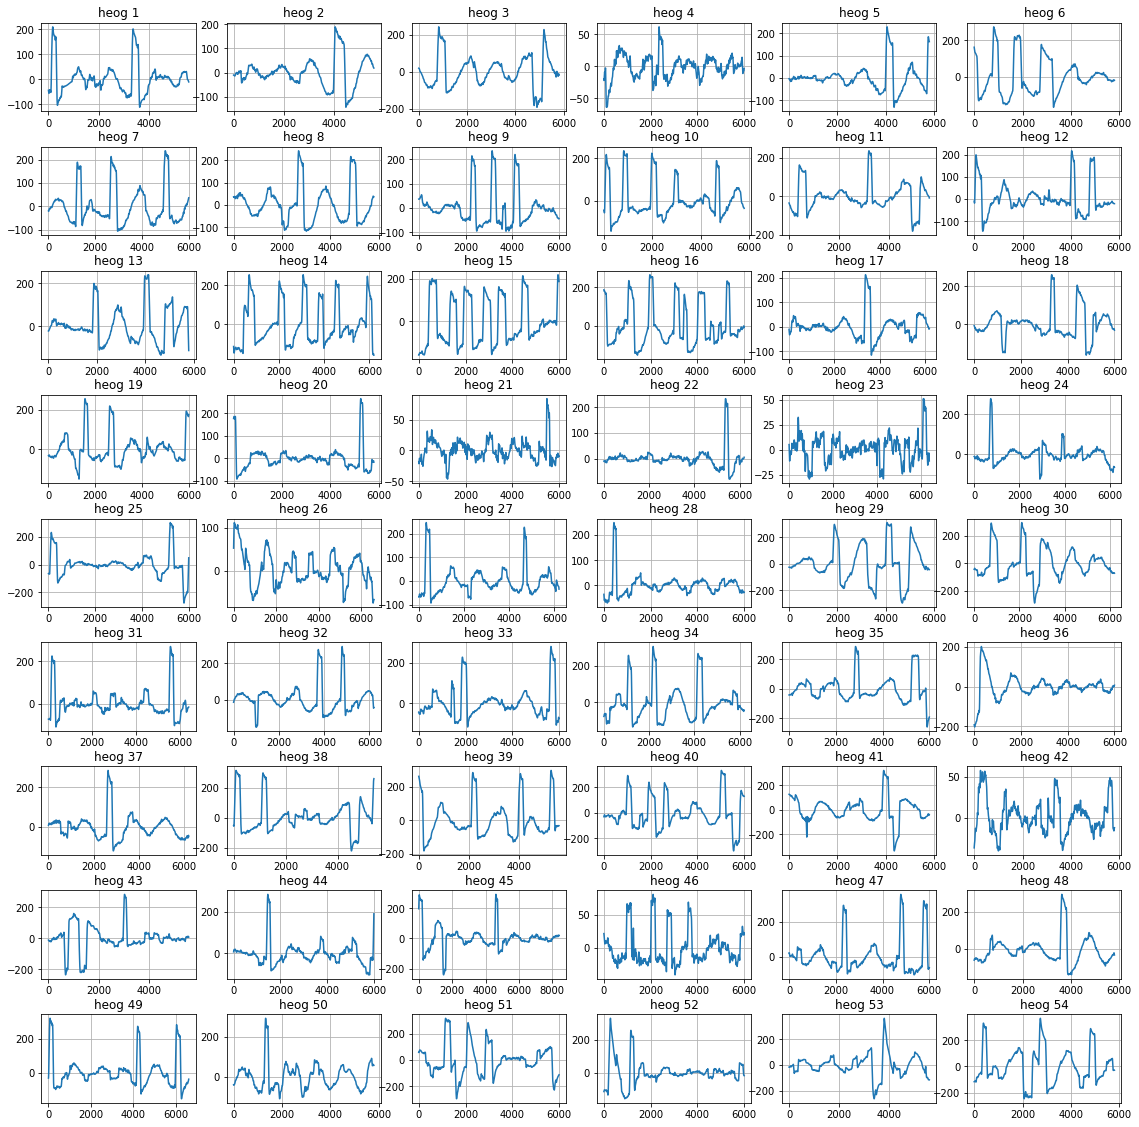

In [7]:
if jupyter:
    heog_dict = loadmat(heog_file)
else:
    heog_dict = loadmat("HEOG.mat?raw=true")

new_heog = RemoveKeys(heog_dict)
print(new_heog.keys())
heog_list = [new_heog[heog] for heog in new_heog.keys()]
h_shapes = [ heog_list[i].shape[1] for i in range(0,len(heog_list))]
print("len heog_list: " + str( len(heog_list) ) )
print("len de heog mas larga: "+str( np.amax(h_shapes) ))
print("len de heog mas corta: "+str( np.amin(h_shapes) ))

fig = plt.figure(figsize=(15,15))
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0.4, wspace = 0.2)
for i in range(0,len(heog_list)):
    AddPlot(heog_list[i][0], 9, 6, i+1, "heog "+str(i+1))
plt.show()

dict_keys(['sim1_con', 'sim2_con', 'sim3_con', 'sim4_con', 'sim5_con', 'sim6_con', 'sim7_con', 'sim8_con', 'sim9_con', 'sim10_con', 'sim11_con', 'sim12_con', 'sim13_con', 'sim14_con', 'sim15_con', 'sim16_con', 'sim17_con', 'sim18_con', 'sim19_con', 'sim20_con', 'sim21_con', 'sim22_con', 'sim23_con', 'sim24_con', 'sim25_con', 'sim26_con', 'sim27_con', 'sim28_con', 'sim29_con', 'sim30_con', 'sim31_con', 'sim32_con', 'sim33_con', 'sim34_con', 'sim35_con', 'sim36_con', 'sim37_con', 'sim38_con', 'sim39_con', 'sim40_con', 'sim41_con', 'sim42_con', 'sim43_con', 'sim44_con', 'sim45_con', 'sim46_con', 'sim47_con', 'sim48_con', 'sim49_con', 'sim50_con', 'sim51_con', 'sim52_con', 'sim53_con', 'sim54_con'])
len cont_list: 54
len de cont mas larga: 8401
len de cont mas corta: 5401


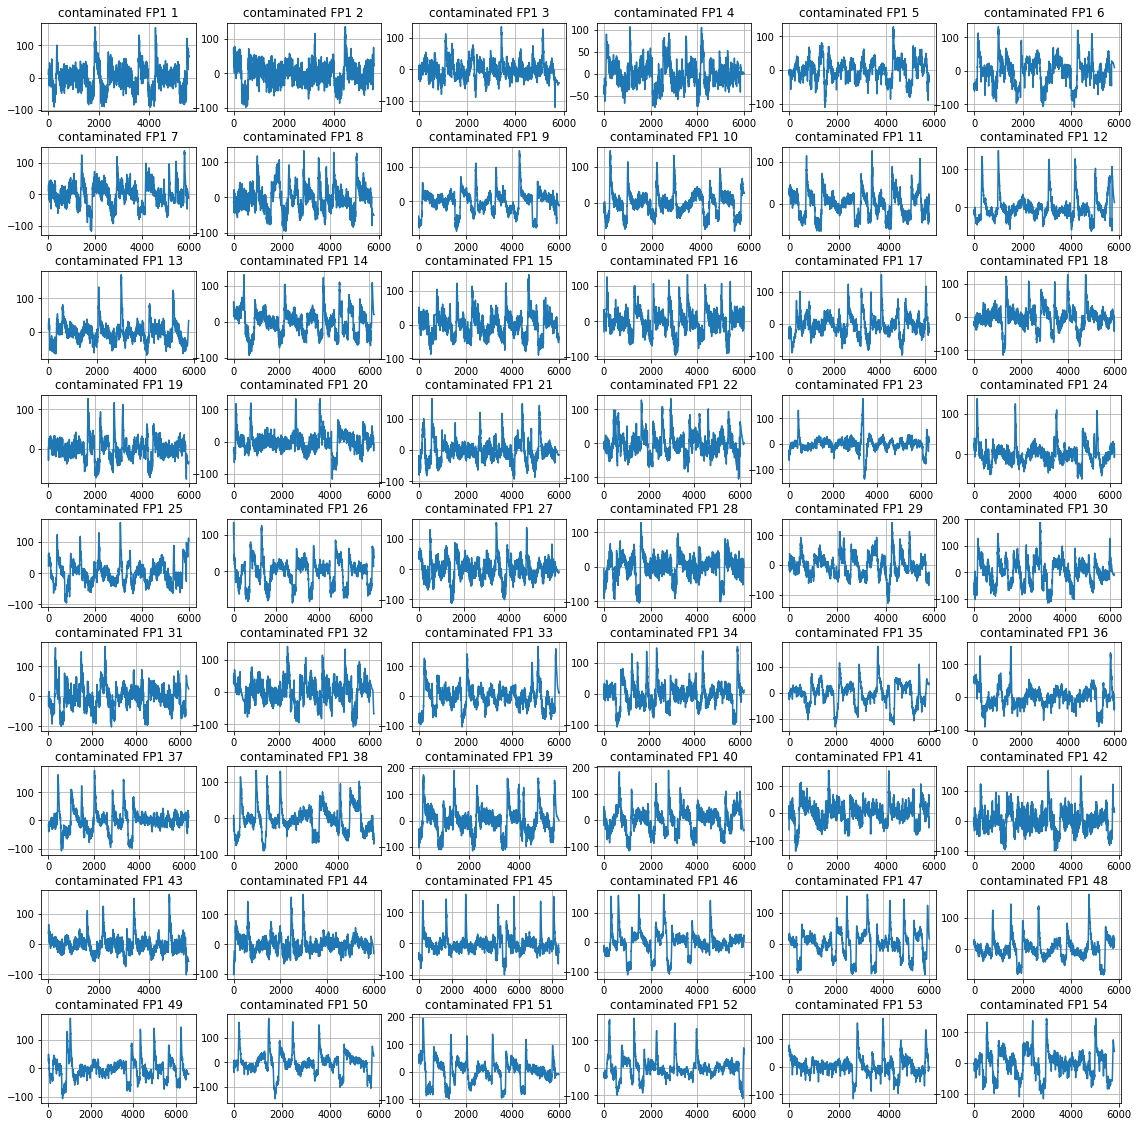

In [8]:
if jupyter:
    cont_data_dict = loadmat(cont_data_file)
else:
    cont_data_dict = loadmat("Contaminated_Data.mat?raw=true")

new_cont_data = RemoveKeys(cont_data_dict)
print(new_cont_data.keys())
cont_data_list = [new_cont_data[cont_data] for cont_data in new_cont_data.keys()]
c_shapes = [ cont_data_list[i].shape[1] for i in range(0,len(cont_data_list))]
print("len cont_list: " + str( len(cont_data_list) ) )
print("len de cont mas larga: "+str( np.amax(c_shapes) ))
print("len de cont mas corta: "+str( np.amin(c_shapes) ))

fig = plt.figure(figsize=(15,15))
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0.4, wspace = 0.2)
for i in range(0,len(cont_data_list)):
    AddPlot(cont_data_list[i][0], 9, 6, i+1, "contaminated FP1 "+str(i+1))
plt.show()

In [9]:
def plot_result(contaminated_signal, clean_signal, filtered_signal):
    plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
    plt.ylabel('Amplitude')
    plt.xlabel('n')
    plt.title('Estimation vs Contaminated EEG')
    plt.grid('on')
    plt.plot(filtered_signal[:-100], label='Filtered')
    plt.plot(contaminated_signal, label='Contaminated')
    plt.legend()
    plt.show()

    plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
    plt.ylabel('Amplitude')
    plt.xlabel('n')
    plt.title('Filtered vs Clean EEG')
    plt.grid('on')
    plt.plot(filtered_signal[:-100], label='Filtered')
    plt.plot(clean_signal, label='Clean')
    plt.legend()
    plt.show()

# Eleccion de una realizacion representativa

In [48]:
#Energias
heog_energy_array  = np.zeros(len(cont_data_list))
veog_energy_array  = np.zeros(len(cont_data_list))
cont_energy_array  = np.zeros(len(cont_data_list))
clean_energy_array  = np.zeros(len(cont_data_list))
print( heog_energy_array.shape )
for i in range(0,len(cont_data_list)):
  heog_energy_array[i]  = np.dot(heog_list[i][0],heog_list[i][0]) / len(heog_list[i][0])
  veog_energy_array[i] = np.dot(veog_list[i][0],veog_list[i][0]) / len(veog_list[i][0])
  cont_energy_array[i] = np.dot(cont_data_list[i][0],cont_data_list[i][0]) / len(cont_data_list[i][0])
  clean_energy_array[i] = np.dot(clean_list[i][0],clean_list[i][0]) / len(clean_list[i][0])
#Medianas
heog_median = np.median(heog_energy_array)
veog_median = np.median(veog_energy_array)
cont_median = np.median(cont_energy_array)
clean_median = np.median(clean_energy_array)
print( "HEOG Energy Median: "+str(int(heog_median)) )
print( "VEOG Energy Median: "+str(int(veog_median)) )
print( "Contaminated Energy Median: "+str(int(cont_median)) )
print( "Clean Energy Median: "+str(int(clean_median)) )
#Busoc la mas similiar al caso medio
heog_index = np.argmin( abs(heog_energy_array - heog_median) )
veog_index = np.argmin( abs(heog_energy_array - heog_median) )
print("Most similar HEOG is in simulation "+str(heog_index+1))
print("Most similar VEOG is in simulation "+str(veog_index+1))

(54,)
HEOG Energy Median: 5419
VEOG Energy Median: 4759
Contaminated Energy Median: 1255
Clean Energy Median: 228
Most similar HEOG is in simulation 33
Most similar VEOG is in simulation 33


Entonces se elige como señal mas representativa la simulacion 33

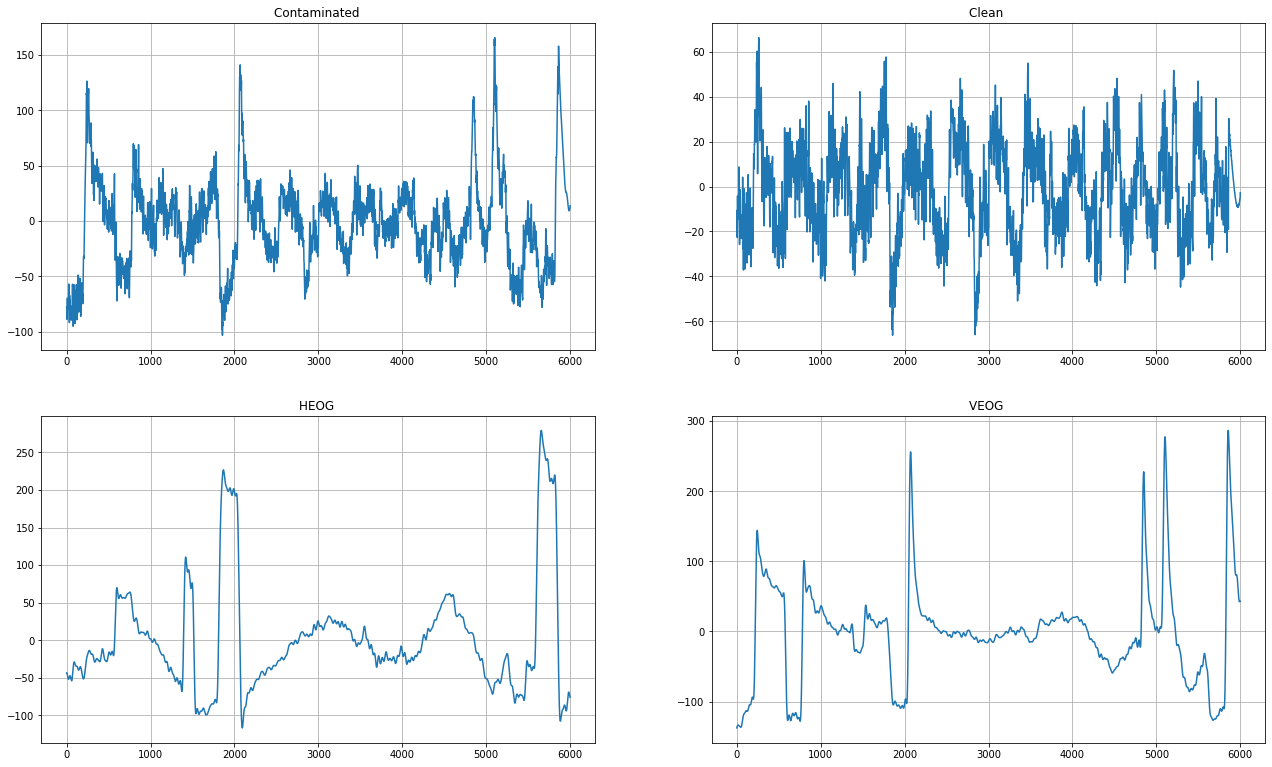

In [54]:
fig = plt.figure(figsize=(17,10))
plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, hspace = 0.2, wspace = 0.21)
AddPlot(cont_data_list[heog_index][0], 2, 2, 1, "Contaminated ")
AddPlot(clean_list[heog_index][0], 2, 2, 2, "Clean ")
AddPlot(heog_list[heog_index][0], 2, 2, 3, "HEOG ")
AddPlot(veog_list[heog_index][0], 2, 2, 4, "VEOG ")
plt.show()

# Implementacion RLS

In [10]:
class FilterRLS():    
    def __init__(self, m, delta, lamda):
        self.m = m
        self.delta = delta
        self.lamda = lamda
        self.p = np.identity(m)/delta
        self.w = np.zeros(m)
        self.inputs = np.zeros(m)

    def adapt(self, e):
        # Calculate k
        aux = np.matmul(np.transpose(self.inputs),self.p)
        k = np.matmul(self.p,self.inputs)/(self.lamda+np.matmul(aux,self.inputs))
        # Calculate P
        self.p = self.p/self.lamda - (k*self.inputs.T*self.p)/self.lamda 
        # Actualize w
        self.w += k * e      

    def filter_sample(self, x):
        shifted = shift(self.inputs, 1, cval=0)
        shifted[0] = x
        self.inputs = shifted
        return np.dot(self.w, self.inputs)

def FilterEOG(h_filter, v_filter, v_sample, h_sample, eeg_sample):
    # Calculate outputs
    veog_out = v_filter.filter_sample(v_sample)
    heog_out = h_filter.filter_sample(h_sample)
    # Estimate EEG
    clean_sample = eeg_sample - veog_out - heog_out
    return clean_sample

## Señales en el tiempo

In [111]:
# Eleccion del modelo
selected_delta = 1e3
selected_lamda = 0.99999
M = 2
filter1 = FilterRLS(m=M, delta=selected_delta, lamda=selected_lamda)
filter2 = FilterRLS(m=M, delta=selected_delta, lamda=selected_lamda)

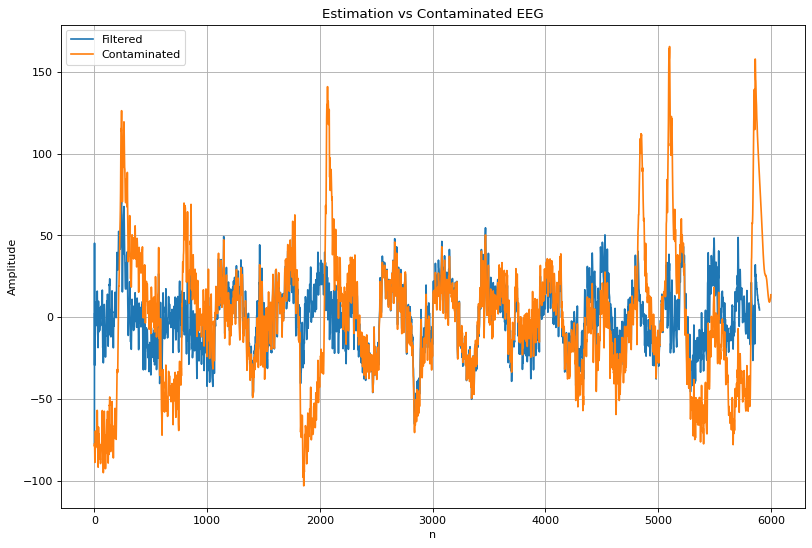

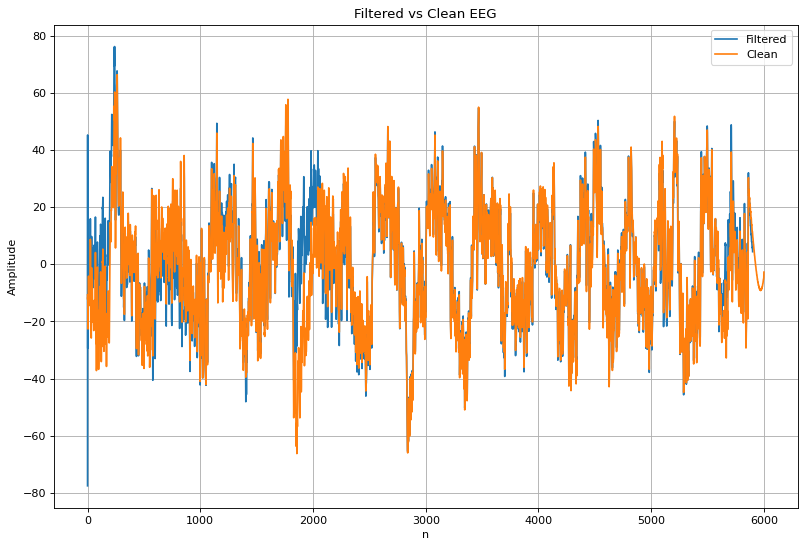

In [112]:
contaminated_signal = cont_data_list[heog_index][0].astype(np.float64)
veog_signal = veog_list[heog_index][0].astype(np.float64)
heog_signal = heog_list[heog_index][0].astype(np.float64)
desired_signal = clean_list[heog_index][0].astype(np.float64)

#print(veog_signal.var())
#print(heog_signal.var())

clean_estimation = np.zeros(len(contaminated_signal))

for i in range(0,len(contaminated_signal)):
    veog_sample = veog_signal[i]
    heog_sample = heog_signal[i]
    eeg_sample = contaminated_signal[i]

    #calculate outputs
    veog_out = filter1.filter_sample(veog_sample)
    heog_out = filter2.filter_sample(heog_sample)
    #estimate EEG
    clean_estimation[i] =  eeg_sample - veog_out - heog_out

    # update filters
    filter1.adapt( e=clean_estimation[i])
    filter2.adapt( e=clean_estimation[i])

plot_result(contaminated_signal, desired_signal, clean_estimation)

# Eleccion de hiperparametros

### Orden del filtro M

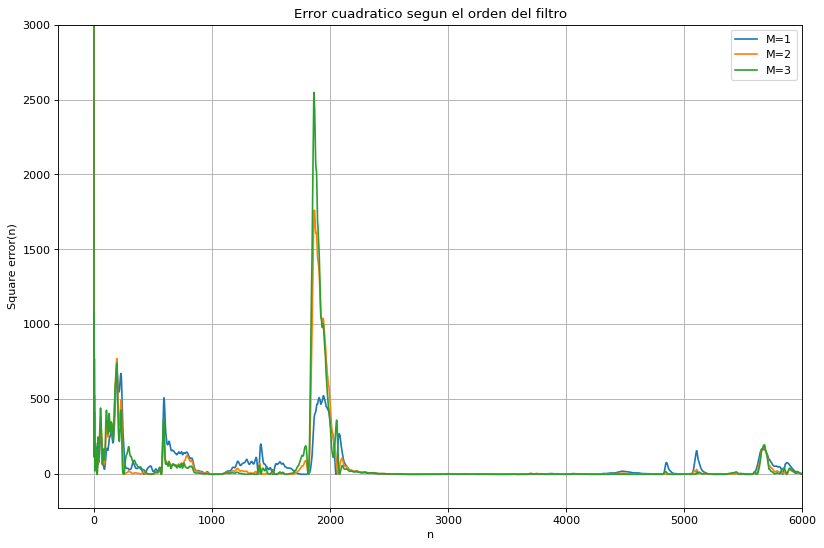

In [113]:
# Eleccion del modelo
selected_delta = 1000 # 0.56
selected_lamda = 0.99999

M_values = np.linspace(start=1,stop=3, num=3, dtype = int)
js = np.zeros( (54,5401) )
j_list = np.zeros( (len(M_values),5401))


plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
plt.ylabel('Square error(n)')
plt.xlabel('n')
plt.title('Error cuadratico segun el orden del filtro')
plt.grid('on')

for j in range(0,len(M_values)):
  M_test = M_values[j]
  contaminated_signal = cont_data_list[heog_index][0].astype(np.float64)
  veog_signal = veog_list[heog_index][0].astype(np.float64)
  heog_signal = heog_list[heog_index][0].astype(np.float64)
  desired_signal = clean_list[heog_index][0].astype(np.float64)
  clean_estimation = np.zeros(len(contaminated_signal))
  filter1 = FilterRLS(m=M_test, delta=selected_delta, lamda=selected_lamda)
  filter2 = FilterRLS(m=M_test, delta=selected_delta, lamda=selected_lamda)

  for k in range(0,len(contaminated_signal)):
    veog_sample = veog_signal[k]
    heog_sample = heog_signal[k]
    eeg_sample = contaminated_signal[k]
    #calculate outputs
    veog_out = filter1.filter_sample(veog_sample)
    heog_out = filter2.filter_sample(heog_sample)
    #estimate EEG
    clean_estimation[k] =  eeg_sample - veog_out - heog_out

    # update filters
    filter1.adapt( e=clean_estimation[k])
    filter2.adapt( e=clean_estimation[k])
  Squared_error = (desired_signal - clean_estimation)**2
  plt.plot(Squared_error, label="M="+str(M_test))
plt.ylim(top=3000)
plt.xlim(right=6000)
plt.legend()
plt.show()

No parece haber ninguna mejora apreciable al incrementar el orden del filtro. Por lo que se elige el filtro mas simple como el optimo y s ellega a:
$$M_{opt}=1$$

### $\lambda$

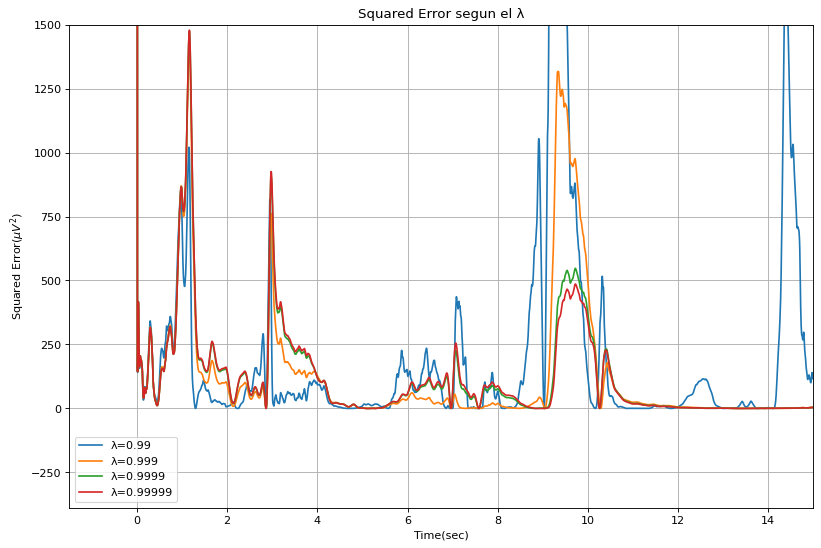

In [101]:
# Eleccion del modelo
selected_delta = 0.01
lambda_list = [0.99,0.999,0.9999,0.99999]

M_test = 1


plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
plt.ylabel('Squared Error($μV^2$)')
plt.xlabel('Time(sec)')
plt.title('Squared Error segun el λ')
plt.grid('on')

for j in range(0,len(lambda_list)):
  selected_lamda = lambda_list[j]
  contaminated_signal = cont_data_list[heog_index][0].astype(np.float64)
  veog_signal = veog_list[heog_index][0].astype(np.float64)
  heog_signal = heog_list[heog_index][0].astype(np.float64)
  desired_signal = clean_list[heog_index][0].astype(np.float64)
  clean_estimation = np.zeros(len(contaminated_signal))
  filter1 = FilterRLS(m=M_test, delta=selected_delta, lamda=selected_lamda)
  filter2 = FilterRLS(m=M_test, delta=selected_delta, lamda=selected_lamda)

  for k in range(0,len(contaminated_signal)):
    veog_sample = veog_signal[k]
    heog_sample = heog_signal[k]
    eeg_sample = contaminated_signal[k]
    #calculate outputs
    veog_out = filter1.filter_sample(veog_sample)
    heog_out = filter2.filter_sample(heog_sample)
    #estimate EEG
    clean_estimation[k] =  eeg_sample - veog_out - heog_out

    # update filters
    filter1.adapt( e=clean_estimation[k])
    filter2.adapt( e=clean_estimation[k])
  Squared_error = (desired_signal - clean_estimation)**2
  plt.plot(np.arange(0,len(contaminated_signal))/200,Squared_error, label="λ="+str(selected_lamda))
plt.ylim(top=1500)
plt.xlim(right=15)
plt.legend()
plt.show()

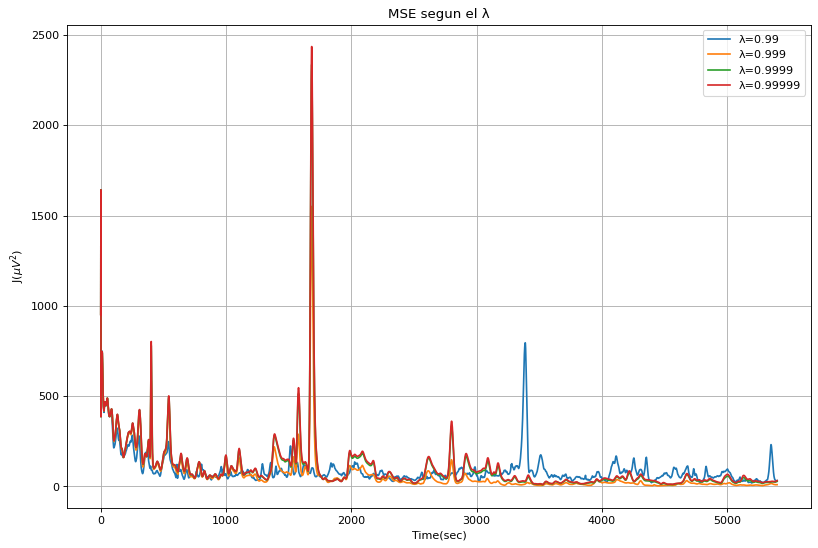

In [91]:
# Eleccion del modelo
selected_delta = 0.01
lambda_list = [0.99,0.999,0.9999,0.99999]

M_test = 1
js = np.zeros( (54,5401) )
j_list = np.zeros( (len(lambda_list),5401))


plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
plt.ylabel('J($μV^2$)')
plt.xlabel('Time(sec)')
plt.title('MSE segun el λ')
plt.grid('on')

for j in range(0,len(lambda_list)):
  selected_lamda = lambda_list[j]
  for i in range(0, len(cont_data_list)):
    contaminated_signal = cont_data_list[i][0].astype(np.float64)
    veog_signal = veog_list[i][0].astype(np.float64)
    heog_signal = heog_list[i][0].astype(np.float64)
    desired_signal = clean_list[i][0].astype(np.float64)
    clean_estimation = np.zeros(len(contaminated_signal))
    filter1 = FilterRLS(m=M_test, delta=selected_delta, lamda=selected_lamda)
    filter2 = FilterRLS(m=M_test, delta=selected_delta, lamda=selected_lamda)

    for k in range(0,len(contaminated_signal)):
      veog_sample = veog_signal[k]
      heog_sample = heog_signal[k]
      eeg_sample = contaminated_signal[k]
      #calculate outputs
      veog_out = filter1.filter_sample(veog_sample)
      heog_out = filter2.filter_sample(heog_sample)
      #estimate EEG
      clean_estimation[k] =  eeg_sample - veog_out - heog_out

      # update filters
      filter1.adapt( e=clean_estimation[k])
      filter2.adapt( e=clean_estimation[k])
    js[i] = (desired_signal[:5401] - clean_estimation[:5401])**2
  j_list[j] =js.mean(axis=0)
  plt.plot(np.arange(0,5401)/200,j_list[j], label="λ="+str(selected_lamda))
plt.legend()
plt.show()

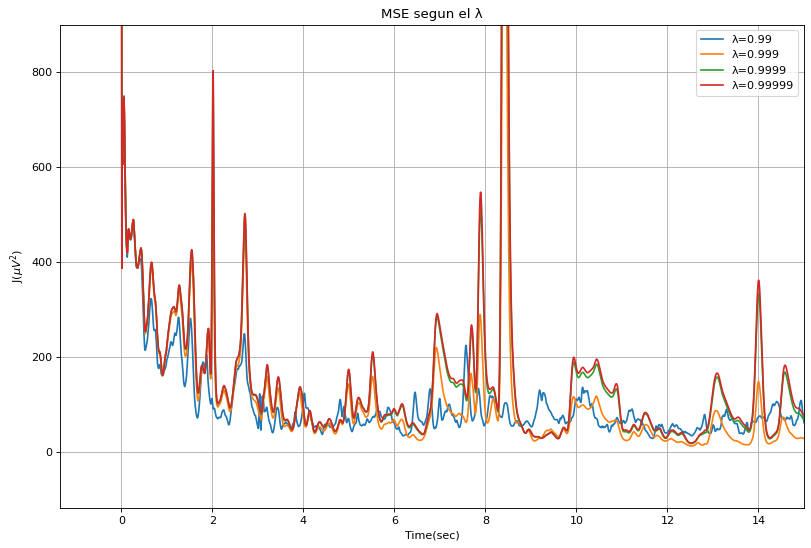

In [92]:
plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
plt.ylabel('J($μV^2$)')
plt.xlabel('Time(sec)')
plt.title('MSE segun el λ')
plt.grid('on')

for i in range(0,len(lambda_list)):
  selected_lamda = lambda_list[i]
  plt.plot(np.arange(0,5401)/200,j_list[i], label="λ="+str(selected_lamda))
plt.legend()
plt.ylim(top=900)
plt.xlim(right=15)
plt.show()

Se puede ver que disminuir el valor de $\lambda$ mejora el error cuadratico. Sin embargo, al disminuirlo tambien empeora el valor cuadratico medio.

No obstante, el error cuadratico medio no empeora significativamente luego de reducir el $\lambda$ mas alla de $0.999$. Se toma como el valor que tiene mejor balance entre error cuadratico medio y error cuadratico el:
$$\lambda = 0.99999$$

### $\delta$

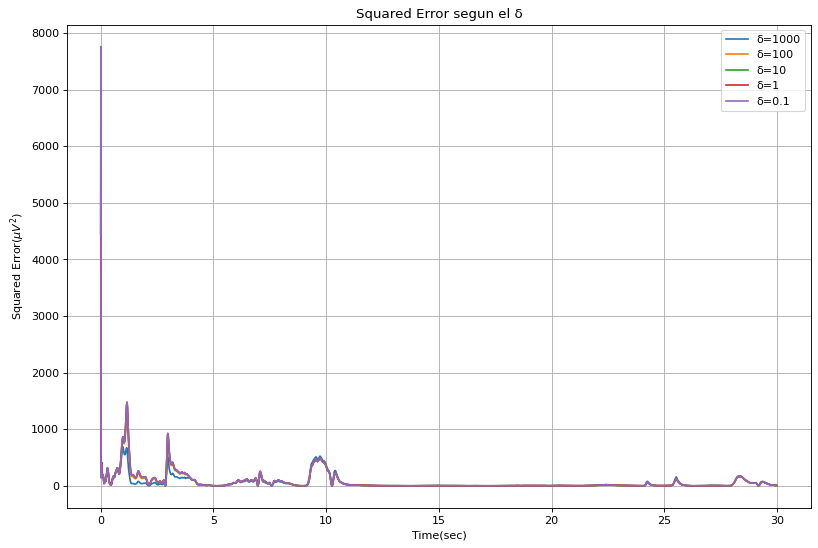

In [108]:
# Eleccion del modelo
delta_list = [1000,100,10,1,0.1]
selected_lamda = 0.99999

M_test = 1


plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
plt.ylabel('Squared Error($μV^2$)')
plt.xlabel('Time(sec)')
plt.title('Squared Error segun el δ')
plt.grid('on')

for j in range(0,len(delta_list)):
  selected_delta = delta_list[j]
  contaminated_signal = cont_data_list[heog_index][0].astype(np.float64)
  veog_signal = veog_list[heog_index][0].astype(np.float64)
  heog_signal = heog_list[heog_index][0].astype(np.float64)
  desired_signal = clean_list[heog_index][0].astype(np.float64)
  clean_estimation = np.zeros(len(contaminated_signal))
  filter1 = FilterRLS(m=M_test, delta=selected_delta, lamda=selected_lamda)
  filter2 = FilterRLS(m=M_test, delta=selected_delta, lamda=selected_lamda)

  for k in range(0,len(contaminated_signal)):
    veog_sample = veog_signal[k]
    heog_sample = heog_signal[k]
    eeg_sample = contaminated_signal[k]
    #calculate outputs
    veog_out = filter1.filter_sample(veog_sample)
    heog_out = filter2.filter_sample(heog_sample)
    #estimate EEG
    clean_estimation[k] =  eeg_sample - veog_out - heog_out

    # update filters
    filter1.adapt( e=clean_estimation[k])
    filter2.adapt( e=clean_estimation[k])
  Squared_error = (desired_signal - clean_estimation)**2
  plt.plot(np.arange(0,len(contaminated_signal))/200,Squared_error, label="δ="+str(selected_delta))
plt.legend()
plt.show()

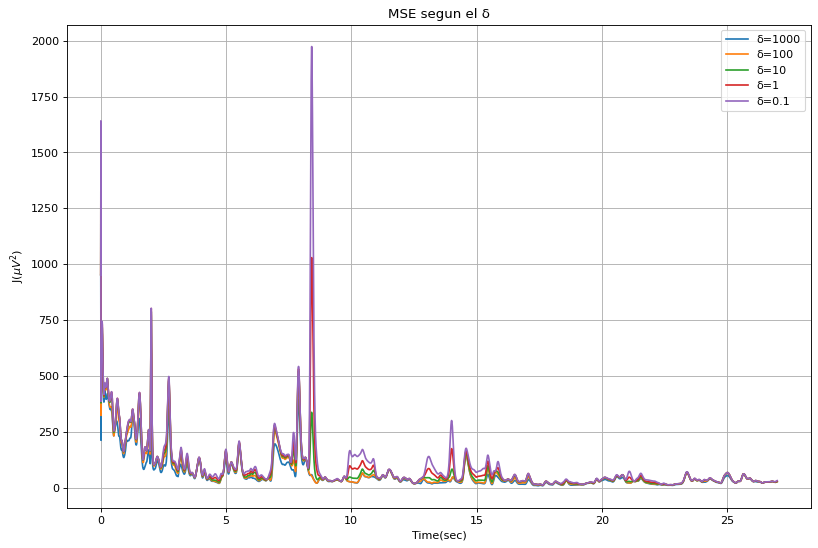

In [109]:
# Eleccion del modelo
delta_list = [1000,100,10,1,0.1]
selected_lamda = 0.99999

M_test = 1
js = np.zeros( (54,5401) )
j_list = np.zeros( (len(delta_list),5401))


plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
plt.ylabel('J($μV^2$)')
plt.xlabel('Time(sec)')
plt.title('MSE segun el δ')
plt.grid('on')

for j in range(0,len(delta_list)):
  selected_delta = delta_list[j]
  for i in range(0, len(cont_data_list)):
    contaminated_signal = cont_data_list[i][0].astype(np.float64)
    veog_signal = veog_list[i][0].astype(np.float64)
    heog_signal = heog_list[i][0].astype(np.float64)
    desired_signal = clean_list[i][0].astype(np.float64)
    clean_estimation = np.zeros(len(contaminated_signal))
    filter1 = FilterRLS(m=M_test, delta=selected_delta, lamda=selected_lamda)
    filter2 = FilterRLS(m=M_test, delta=selected_delta, lamda=selected_lamda)

    for k in range(0,len(contaminated_signal)):
      veog_sample = veog_signal[k]
      heog_sample = heog_signal[k]
      eeg_sample = contaminated_signal[k]
      #calculate outputs
      veog_out = filter1.filter_sample(veog_sample)
      heog_out = filter2.filter_sample(heog_sample)
      #estimate EEG
      clean_estimation[k] =  eeg_sample - veog_out - heog_out

      # update filters
      filter1.adapt( e=clean_estimation[k])
      filter2.adapt( e=clean_estimation[k])
    js[i] = (desired_signal[:5401] - clean_estimation[:5401])**2
  j_list[j] =js.mean(axis=0)
  plt.plot(np.arange(0,5401)/200,j_list[j], label="δ="+str(selected_delta))
plt.legend()
plt.show()

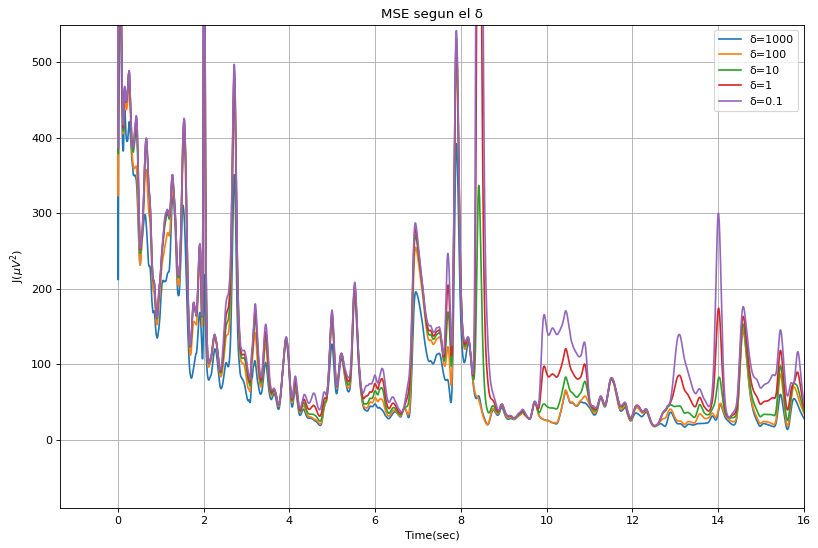

In [110]:
plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
plt.ylabel('J($μV^2$)')
plt.xlabel('Time(sec)')
plt.title('MSE segun el δ')
plt.grid('on')

for i in range(0,len(delta_list)):
  selected_delta = delta_list[i]
  plt.plot(np.arange(0,5401)/200,j_list[i], label="δ="+str(selected_delta))
plt.legend()
plt.ylim(top=550)
plt.xlim(right=16)
plt.show()

## Coefficient tracking

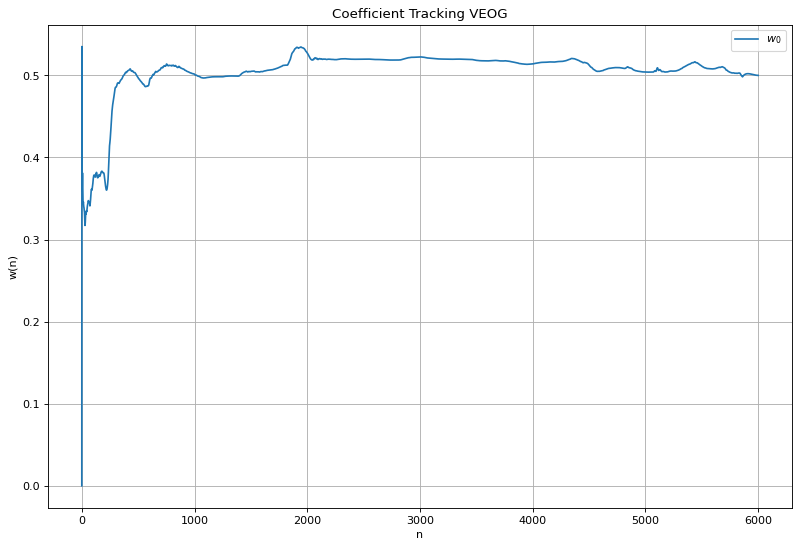

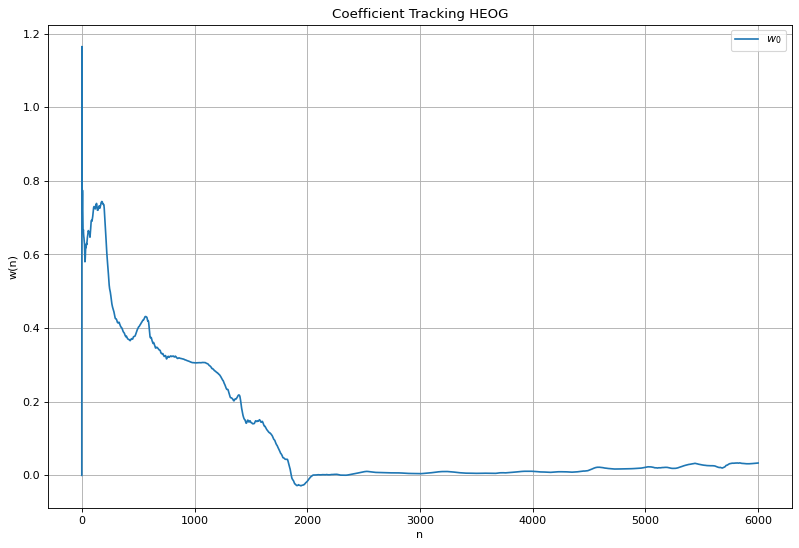

In [114]:
#Mediciones
contaminated_signal = cont_data_list[heog_index][0].astype(np.float64) 
veog_signal = veog_list[heog_index][0].astype(np.float64) 
heog_signal = heog_list[heog_index][0].astype(np.float64)
desired_signal = clean_list[heog_index][0].astype(np.float64)

clean_estimation = np.zeros(len(contaminated_signal))
#Parametros
selected_delta = 1000
selected_lamda = 0.99999
M = 1
w_v = np.zeros((len(contaminated_signal),M))
w_h = np.zeros((len(contaminated_signal),M))

filter1 = FilterRLS(m=M, delta=selected_delta, lamda=selected_lamda)
filter2 = FilterRLS(m=M, delta=selected_delta, lamda=selected_lamda)
for k in range(0,len(contaminated_signal)):
  veog_sample = veog_signal[k]
  heog_sample = heog_signal[k]
  eeg_sample = contaminated_signal[k]
  w_v[k] = filter1.w
  w_h[k] = filter2.w

  #calculate outputs
  veog_out = filter1.filter_sample(veog_sample)
  heog_out = filter2.filter_sample(heog_sample)
  #estimate EEG
  clean_estimation[k] =   eeg_sample - veog_out - heog_out

  # update filters
  filter1.adapt( e=clean_estimation[k])
  filter2.adapt( e=clean_estimation[k])

plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
plt.ylabel('w(n)')
plt.xlabel('n')
plt.title('Coefficient Tracking VEOG')
plt.grid('on')
for i in range(M):
    plt.plot(w_v[:,i], label=r'$w_{%i}$'%i)
plt.legend()
plt.show()

plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
plt.ylabel('w(n)')
plt.xlabel('n')
plt.title('Coefficient Tracking HEOG')
plt.grid('on')
for i in range(M):
    plt.plot(w_h[:,i], label=r'$w_{%i}$'%i)
plt.legend()
plt.show()

## Comparacion Con LMS

In [116]:
class FilterVSLMS():    
    def __init__(self, m, mu_k, m0, m1, mu_max, mu_min, alpha=2):
        self.m = m
        self.mu_k = mu_k
        self.m0 = m0
        self.m1 = m1
        self.mu_min = mu_min
        self.mu_max = mu_max
        self.alpha = alpha
        self.w = np.zeros(m)
        self.inputs = np.zeros(m)
        self.last_js = np.zeros((m, np.amax([m0,m1])))

    def adapt(self, e):  
        self.w += self.mu_k * e * self.inputs
        # Actualizamos mu_k
        j_sign =  np.sign(-e*self.inputs)
        for m_aux in range(self.m):
            if not np.all( np.equal(self.last_js[m_aux,:self.m0], j_sign[m_aux]) ):
                if not self.mu_k[m_aux]/self.alpha < self.mu_min:
                    self.mu_k[m_aux] = self.mu_k[m_aux]/self.alpha
                else:
                    self.mu_k[m_aux] = self.mu_min
            elif np.all( np.equal(self.last_js[m_aux,:self.m1], j_sign[m_aux]) ):
                if not self.mu_k[m_aux]*self.alpha > self.mu_max:
                    self.mu_k[m_aux]= self.mu_k[m_aux]*self.alpha
                else:
                    self.mu_k[m_aux]= self.mu_max
            #Actualizo buffer de muestras de signo
            self.last_js[m_aux] = shift(self.last_js[m_aux], 1, cval=0)
            self.last_js[m_aux,0] = j_sign[m_aux]
        
        
    def filter_sample(self, x):
        shifted = shift(self.inputs, 1, cval=0)
        shifted[0] = x
        self.inputs = shifted
        return np.dot(self.w, self.inputs)

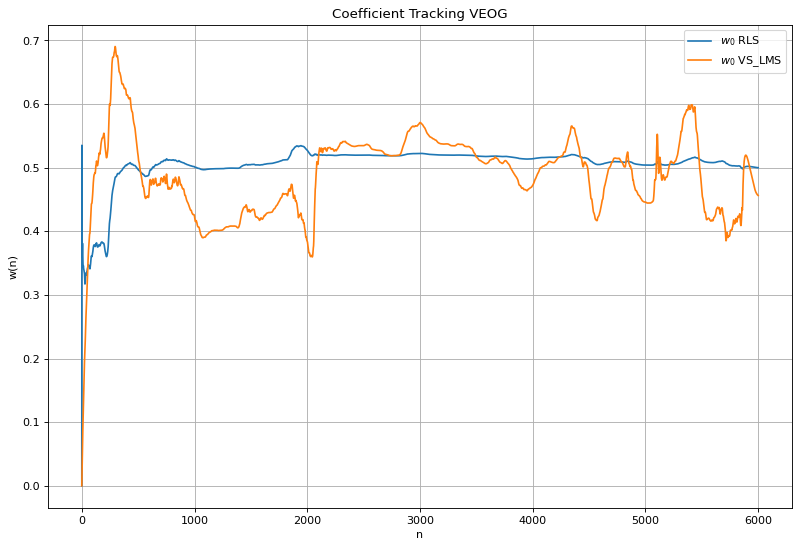

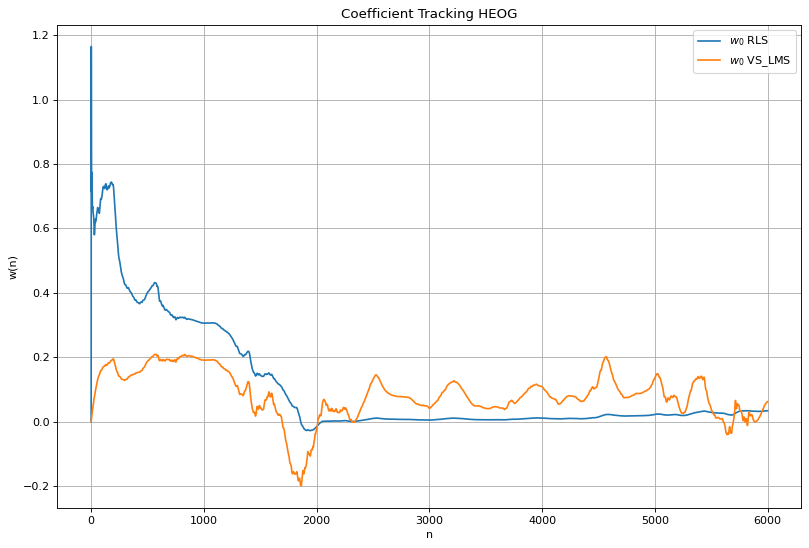

In [117]:
#Mediciones
contaminated_signal = cont_data_list[heog_index][0].astype(np.float64) 
veog_signal = veog_list[heog_index][0].astype(np.float64) 
heog_signal = heog_list[heog_index][0].astype(np.float64)
desired_signal = clean_list[heog_index][0].astype(np.float64)

clean_estimation_rls = np.zeros(len(contaminated_signal))
clean_estimation_lms = np.zeros(len(contaminated_signal))
#RLS
#Parametros
selected_delta = 1000
selected_lamda = 0.99999
M = 1
w_v_rls = np.zeros((len(contaminated_signal),M))
w_h_rls = np.zeros((len(contaminated_signal),M))

filter1_rls = FilterRLS(m=M, delta=selected_delta, lamda=selected_lamda)
filter2_rls = FilterRLS(m=M, delta=selected_delta, lamda=selected_lamda)
#Vairable Step LMS
# Eleccion del modelo
M = 1
selected_m0 = 1
selected_m1 = 1
selected_mu_max = 1e-6
selected_mu_min = 1e-10
selected_mu_k = np.ones(M)*selected_mu_max

w_v_lms = np.zeros((len(contaminated_signal),M))
w_h_lms = np.zeros((len(contaminated_signal),M))

filter1_lms = FilterVSLMS(m=M, mu_k=selected_mu_k.copy(), m0=selected_m0, m1=selected_m1, mu_max=selected_mu_max,
                      mu_min=selected_mu_min)
filter2_lms = FilterVSLMS(m=M, mu_k=selected_mu_k.copy(), m0=selected_m0, m1=selected_m1, mu_max=selected_mu_max,
                      mu_min=selected_mu_min)

for k in range(0,len(contaminated_signal)):
  veog_sample = veog_signal[k]
  heog_sample = heog_signal[k]
  eeg_sample = contaminated_signal[k]
  w_v_rls[k] = filter1_rls.w
  w_h_rls[k] = filter2_rls.w

  w_v_lms[k] = filter1_lms.w
  w_h_lms[k] = filter2_lms.w

  #calculate outputs
  veog_out_rls = filter1_rls.filter_sample(veog_sample)
  heog_out_rls = filter2_rls.filter_sample(heog_sample)

  veog_out_lms = filter1_lms.filter_sample(veog_sample)
  heog_out_lms = filter2_lms.filter_sample(heog_sample)
  #estimate EEG
  clean_estimation_rls[k] =   eeg_sample - veog_out_rls - heog_out_rls
  clean_estimation_lms[k] =   eeg_sample - veog_out_lms - heog_out_lms
  # update filters
  filter1_rls.adapt( e=clean_estimation_rls[k])
  filter2_rls.adapt( e=clean_estimation_rls[k])

  filter1_lms.adapt( e=clean_estimation_lms[k])
  filter2_lms.adapt( e=clean_estimation_lms[k])

plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
plt.ylabel('w(n)')
plt.xlabel('n')
plt.title('Coefficient Tracking VEOG')
plt.grid('on')
for i in range(M):
    plt.plot(w_v_rls[:,i], label=r'$w_{%i}$ RLS'%i)
    plt.plot(w_v_lms[:,i], label=r'$w_{%i}$ VS_LMS'%i)
plt.legend()
plt.show()

plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
plt.ylabel('w(n)')
plt.xlabel('n')
plt.title('Coefficient Tracking HEOG')
plt.grid('on')
for i in range(M):
    plt.plot(w_h_rls[:,i], label=r'$w_{%i}$ RLS'%i)
    plt.plot(w_h_lms[:,i], label=r'$w_{%i}$ VS_LMS'%i)
plt.legend()
plt.show()

### Error cuadratico Medio

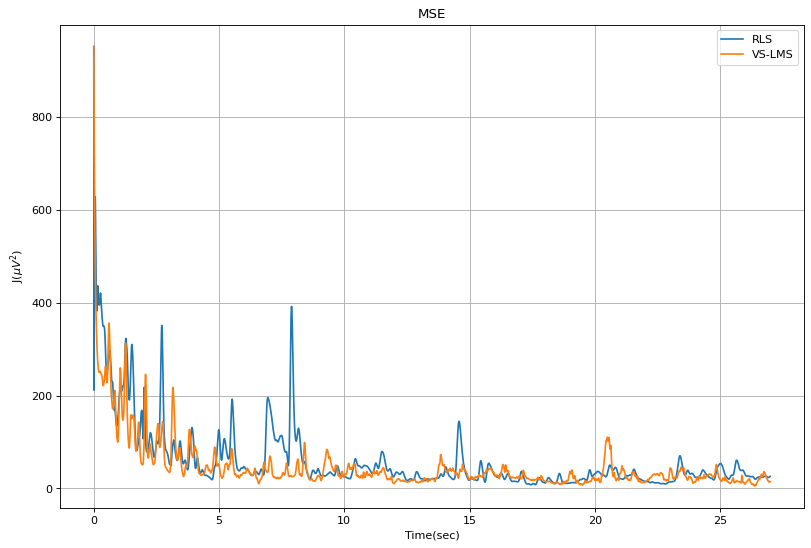

In [121]:
# Eleccion del modelo RlS
selected_delta = 1000
selected_lamda = 0.99999

M = 1
js_rls = np.zeros( (54,5401) )
js_lms = np.zeros( (54,5401) )
j_list_rls = np.zeros( 5401 )
j_list_lms = np.zeros( 5401 )
#Eleccion del modelo VSLMS
selected_m0 = 1
selected_m1 = 1
selected_mu_max = 1e-6
selected_mu_min = 1e-10
selected_mu_k = np.ones(M)*selected_mu_max

plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
plt.ylabel('J($μV^2$)')
plt.xlabel('Time(sec)')
plt.title('MSE')
plt.grid('on')

for i in range(0, len(cont_data_list)):
  contaminated_signal = cont_data_list[i][0].astype(np.float64)
  veog_signal = veog_list[i][0].astype(np.float64)
  heog_signal = heog_list[i][0].astype(np.float64)
  desired_signal = clean_list[i][0].astype(np.float64)
  clean_estimation_rls = np.zeros(len(contaminated_signal))
  clean_estimation_lms = np.zeros(len(contaminated_signal))

  filter1_rls = FilterRLS(m=M, delta=selected_delta, lamda=selected_lamda)
  filter2_rls = FilterRLS(m=M, delta=selected_delta, lamda=selected_lamda)

  filter1_lms = FilterVSLMS(m=M, mu_k=selected_mu_k.copy(), m0=selected_m0, m1=selected_m1, mu_max=selected_mu_max,
                      mu_min=selected_mu_min)
  filter2_lms = FilterVSLMS(m=M, mu_k=selected_mu_k.copy(), m0=selected_m0, m1=selected_m1, mu_max=selected_mu_max,
                      mu_min=selected_mu_min)

  for k in range(0,len(contaminated_signal)):
    veog_sample = veog_signal[k]
    heog_sample = heog_signal[k]
    eeg_sample = contaminated_signal[k]

    #calculate outputs
    veog_out_rls = filter1_rls.filter_sample(veog_sample)
    heog_out_rls = filter2_rls.filter_sample(heog_sample)

    veog_out_lms = filter1_lms.filter_sample(veog_sample)
    heog_out_lms = filter2_lms.filter_sample(heog_sample)
    #estimate EEG
    clean_estimation_rls[k] =   eeg_sample - veog_out_rls - heog_out_rls
    clean_estimation_lms[k] =   eeg_sample - veog_out_lms - heog_out_lms
    # update filters
    filter1_rls.adapt( e=clean_estimation_rls[k])
    filter2_rls.adapt( e=clean_estimation_rls[k])

    filter1_lms.adapt( e=clean_estimation_lms[k])
    filter2_lms.adapt( e=clean_estimation_lms[k])
  js_rls[i] = (desired_signal[:5401] - clean_estimation_rls[:5401])**2
  js_lms[i] = (desired_signal[:5401] - clean_estimation_lms[:5401])**2
j_list_rls =js_rls.mean(axis=0)
j_list_lms =js_lms.mean(axis=0)
plt.plot(np.arange(0,5401)/200,j_list_rls, label="RLS")
plt.plot(np.arange(0,5401)/200,j_list_lms, label="VS-LMS")
plt.legend()
plt.show()

### Error cuadratico

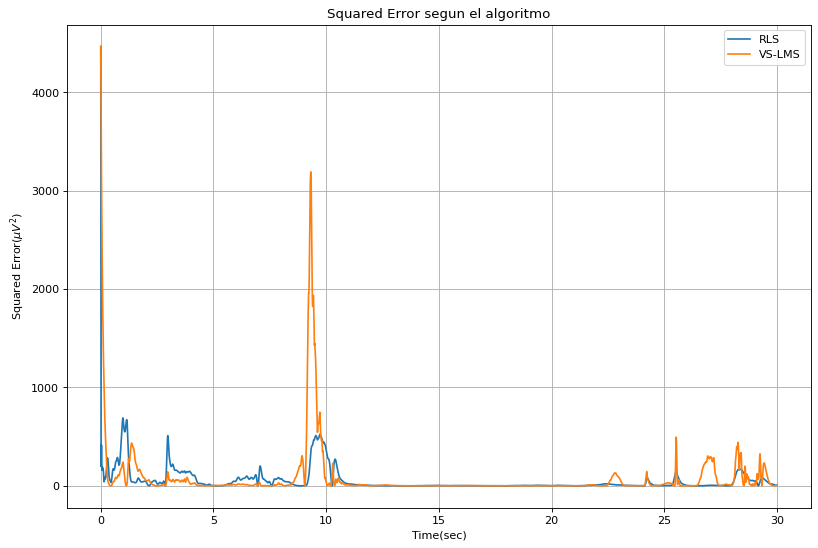

In [125]:
#Mediciones
contaminated_signal = cont_data_list[heog_index][0].astype(np.float64) 
veog_signal = veog_list[heog_index][0].astype(np.float64) 
heog_signal = heog_list[heog_index][0].astype(np.float64)
desired_signal = clean_list[heog_index][0].astype(np.float64)

clean_estimation_rls = np.zeros(len(contaminated_signal))
clean_estimation_lms = np.zeros(len(contaminated_signal))
#RLS
#Parametros
selected_delta = 1000
selected_lamda = 0.99999
M = 1

filter1_rls = FilterRLS(m=M, delta=selected_delta, lamda=selected_lamda)
filter2_rls = FilterRLS(m=M, delta=selected_delta, lamda=selected_lamda)
#Vairable Step LMS
# Eleccion del modelo
selected_m0 = 1
selected_m1 = 1
selected_mu_max = 1e-6
selected_mu_min = 1e-10
selected_mu_k = np.ones(M)*selected_mu_max

filter1_lms = FilterVSLMS(m=M, mu_k=selected_mu_k.copy(), m0=selected_m0, m1=selected_m1, mu_max=selected_mu_max,
                      mu_min=selected_mu_min)
filter2_lms = FilterVSLMS(m=M, mu_k=selected_mu_k.copy(), m0=selected_m0, m1=selected_m1, mu_max=selected_mu_max,
                      mu_min=selected_mu_min)

for k in range(0,len(contaminated_signal)):
  veog_sample = veog_signal[k]
  heog_sample = heog_signal[k]
  eeg_sample = contaminated_signal[k]

  #calculate outputs
  veog_out_rls = filter1_rls.filter_sample(veog_sample)
  heog_out_rls = filter2_rls.filter_sample(heog_sample)

  veog_out_lms = filter1_lms.filter_sample(veog_sample)
  heog_out_lms = filter2_lms.filter_sample(heog_sample)
  #estimate EEG
  clean_estimation_rls[k] =   eeg_sample - veog_out_rls - heog_out_rls
  clean_estimation_lms[k] =   eeg_sample - veog_out_lms - heog_out_lms
  # update filters
  filter1_rls.adapt( e=clean_estimation_rls[k])
  filter2_rls.adapt( e=clean_estimation_rls[k])

  filter1_lms.adapt( e=clean_estimation_lms[k])
  filter2_lms.adapt( e=clean_estimation_lms[k])

Squared_error_rls = (desired_signal - clean_estimation_rls)**2
Squared_error_lms = (desired_signal - clean_estimation_lms)**2

plt.figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='k')
plt.ylabel('Squared Error($μV^2$)')
plt.xlabel('Time(sec)')
plt.title('Squared Error segun el algoritmo')
plt.grid('on')
plt.plot(np.arange(0,len(contaminated_signal))/200,Squared_error_rls, label="RLS")
plt.plot(np.arange(0,len(contaminated_signal))/200,Squared_error_lms, label="VS-LMS")
plt.legend()
plt.show()

### Señales en el tiempo

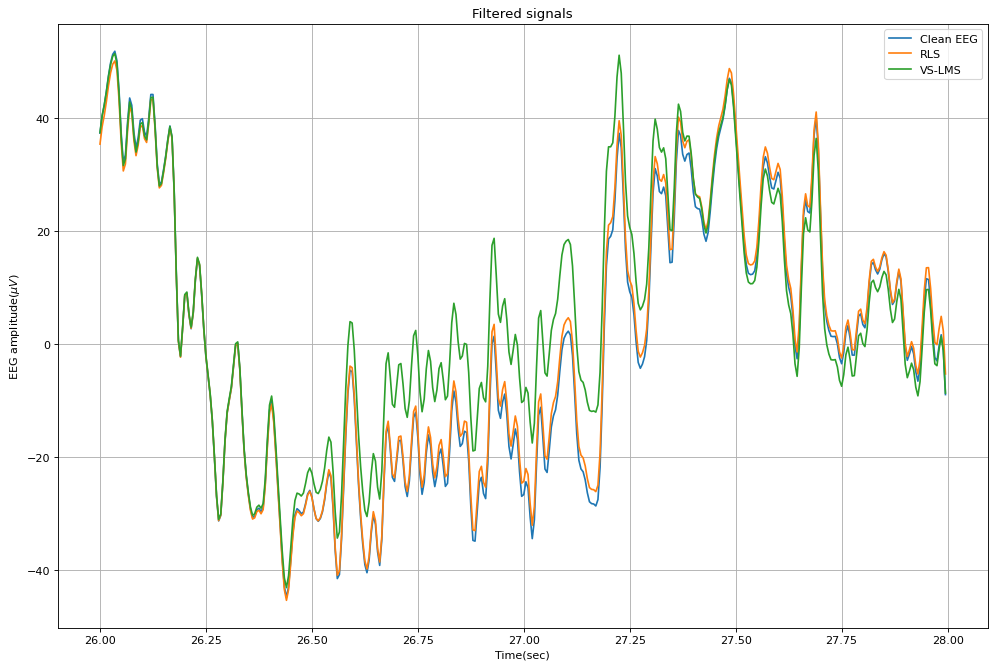

In [134]:
#Mediciones
contaminated_signal = cont_data_list[heog_index][0].astype(np.float64) 
veog_signal = veog_list[heog_index][0].astype(np.float64) 
heog_signal = heog_list[heog_index][0].astype(np.float64)
desired_signal = clean_list[heog_index][0].astype(np.float64)

clean_estimation_rls = np.zeros(len(contaminated_signal))
clean_estimation_lms = np.zeros(len(contaminated_signal))
#RLS
#Parametros
selected_delta = 1000
selected_lamda = 0.99999
M = 1

filter1_rls = FilterRLS(m=M, delta=selected_delta, lamda=selected_lamda)
filter2_rls = FilterRLS(m=M, delta=selected_delta, lamda=selected_lamda)
#Vairable Step LMS
# Eleccion del modelo
selected_m0 = 1
selected_m1 = 1
selected_mu_max = 1e-6
selected_mu_min = 1e-10
selected_mu_k = np.ones(M)*selected_mu_max

filter1_lms = FilterVSLMS(m=M, mu_k=selected_mu_k.copy(), m0=selected_m0, m1=selected_m1, mu_max=selected_mu_max,
                      mu_min=selected_mu_min)
filter2_lms = FilterVSLMS(m=M, mu_k=selected_mu_k.copy(), m0=selected_m0, m1=selected_m1, mu_max=selected_mu_max,
                      mu_min=selected_mu_min)

for i in range(0,len(contaminated_signal)):
  veog_sample = veog_signal[i]
  heog_sample = heog_signal[i]
  eeg_sample = contaminated_signal[i]

  #calculate outputs
  veog_out_rls = filter1_rls.filter_sample(veog_sample)
  heog_out_rls = filter2_rls.filter_sample(heog_sample)

  veog_out_lms = filter1_lms.filter_sample(veog_sample)
  heog_out_lms = filter2_lms.filter_sample(heog_sample)
  #estimate EEG
  clean_estimation_rls[i] =   eeg_sample - veog_out_rls - heog_out_rls
  clean_estimation_lms[i] =   eeg_sample - veog_out_lms - heog_out_lms
  # update filters
  filter1_rls.adapt( e=clean_estimation_rls[i])
  filter2_rls.adapt( e=clean_estimation_rls[i])

  filter1_lms.adapt( e=clean_estimation_lms[i])
  filter2_lms.adapt( e=clean_estimation_lms[i])

plt.figure(num=None, figsize=(15,10), dpi=80, facecolor='w', edgecolor='k')
plt.ylabel('EEG amplitude($μV$)')
plt.xlabel('Time(sec)')
plt.title('Filtered signals')
plt.grid('on')
plt.plot(np.arange(5200,5600)/200,desired_signal[5200:5600], label="Clean EEG")
plt.plot(np.arange(5200,5600)/200,clean_estimation_rls[5200:5600], label="RLS")
plt.plot(np.arange(5200,5600)/200,clean_estimation_lms[5200:5600], label="VS-LMS")
plt.legend()
plt.show()